In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2lab, lab2rgb
from tensorflow.keras.preprocessing.image import img_to_array, load_img


In [2]:
# 用户图片处理 256 * 256

In [3]:
# User Input
imgs = []
order = 0
# imgs.append(img_to_array(load_img("./usrInput/user" + str(order)  + ".jpg", target_size=(256, 256))))
imgs.append(img_to_array(load_img("./dataset/DiifGray/WechatIMG64.jpg", target_size=(256, 256))))


imgs = np.array(imgs, dtype=float) / 255.0
labs = np.array([rgb2lab(rgb) for rgb in imgs])



# reshape
x_test = labs[:, :, :, 0]
print(x_test.shape)
x_test = x_test.reshape(x_test.shape + (1, ))
imgs.shape, labs.shape, x_test.shape


(1, 256, 256)


((1, 256, 256, 3), (1, 256, 256, 3), (1, 256, 256, 1))

In [4]:
new_model = tf.keras.models.load_model('model_final/0402_3kimg_8-e04')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-15 00:36:06.550505: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-15 00:36:06.550618: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  4640        ['conv2d[0][0]']                 
                                )                                                             

In [6]:
# new_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['accuracy'])

In [7]:
y_pred = new_model.predict(x_test)
y_pred.shape

2022-05-15 00:36:10.029846: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-15 00:36:10.161575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(1, 256, 256, 2)

In [8]:
y_pred_ab = y_pred * 128.0

y_pred_lab = np.zeros(labs.shape)

y_pred_lab.shape



(1, 256, 256, 3)

In [9]:
y_pred_lab[0, :, :, 0] = x_test[0].reshape(x_test.shape[1:3])

y_pred_lab[0, :, :, 1:] = y_pred_ab[0]

y_pred_lab[0, :, :, 1:].shape, y_pred_lab.shape

((256, 256, 2), (1, 256, 256, 3))

In [10]:
y_pred_rgb = [lab2rgb(lab) for lab in y_pred_lab[0, :, :, :]]
Input_rgb = [lab2rgb(lab) for lab in labs[0, :, :, :]]


In [26]:
img = np.array(y_pred_rgb, dtype=float) / 255.0

img.astype('uint8')

plt.imsave('test_out.jpg',img)



AttributeError: 'list' object has no attribute 'astype'

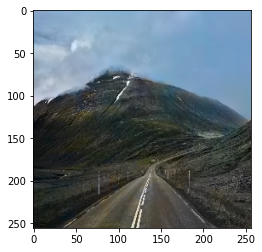

In [14]:

plt.imshow(y_pred_rgb)

plt.axis("off")
plt.title("Output")
plt.show()




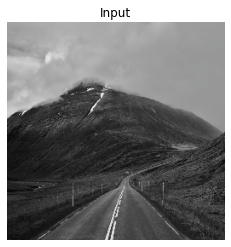

In [12]:
plt.imshow(Input_rgb)
plt.axis("off")
plt.title("Input")
plt.show()
